In [1]:
import heapq
import math
import random

import networkx as nx
import matplotlib.pyplot as plt

N = 500
K = 10
V = [(random.random(), random.random()) for _ in range(N)]

In [2]:
def plot(V, B):
    g = nx.DiGraph({u: [v[1] for v in vs] for u, vs in enumerate(B)})
    plt.figure(figsize=(10, 10))
    nx.draw(g, pos=V, with_labels=True, font_color="w")

In [3]:
# Euclidean distance (should work with similarity measure)
def sigma(u, v):
    return math.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

In [4]:
def naive_init(V):
    return [[(-math.inf, i) for i in random.sample(range(N), K)] for _ in range(N)]

In [5]:
def naive_iterate(V, B):
    # Build list of neighbors and reverse neighbors
    Bbar = [set() for _ in range(N)]
    for u, vs in enumerate(B):
        for _, v in vs:
            Bbar[u].add(v)
            Bbar[v].add(u)
            
    # How many times the kNN lists were updated
    c = 0

    for v in range(N):
        for u1 in Bbar[v]:
            # For each neighbor of my neighbor
            for u2 in Bbar[u1]:
                if v == u2:
                    continue
                
                # Skip u2 if it already exists in my kNN list
                if u2 in [kv[1] for kv in B[v]]:
                    continue
                        
                # Calc distance
                l = sigma(V[v], V[u2])
                
                # Skip u2 if it is further than my furthest neighbor
                if -l < B[v][0][0]:
                    continue
                
                # Insert u2 into my kNN list
                heapq.heapreplace(B[v], (-l, u2))
                c += 1

    return c

In [6]:
def naive_nn_descent(V, B):
    while True:
        c = naive_iterate(V, B)
        print(c)

        if c == 0:
            break
            
    return B

In [7]:
B = naive_init(V)

In [8]:
%%time
B = naive_nn_descent(V, B)

21245
2929
11
0
CPU times: user 370 ms, sys: 26.5 ms, total: 397 ms
Wall time: 264 ms


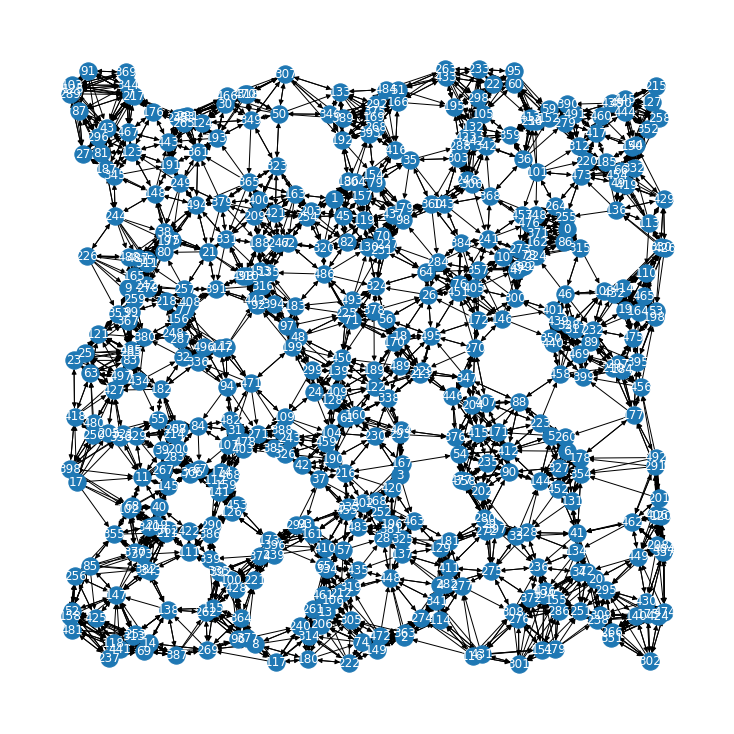

In [9]:
plot(V, B)

In [10]:
def init(V):
    return [[(-math.inf, i, True) for i in random.sample(range(N), K)] for _ in range(N)]

In [11]:
B = init(V)

In [12]:
def iterate(V, B):
    old = [set() for _ in range(N)]
    new = [set() for _ in range(N)]
    
    for v in range(N):
        old[v] = set([i for d, i, f in B[v] if not f])
        new[v] = set([i for d, i, f in B[v] if f])
        B[v] = [(d, i, False) for d, i, f in B[v]]

        for i in old[v]:
            old[i].add(v)
            
        for i in new[v]:
            new[i].add(v)

    c = 0
            
    for v in range(N):
        for u1 in new[v]:
            for u2 in new[v]:
                if u1 >= u2:
                    continue

                l = sigma(V[u1], V[u2])
                
                if -l > B[u1][0][0] and u2 not in [kv[1] for kv in B[u1]]:
                    heapq.heapreplace(B[u1], (-l, u2, True))
                    c += 1
                
                if -l > B[u2][0][0] and u1 not in [kv[1] for kv in B[u2]]:
                    heapq.heapreplace(B[u2], (-l, u1, True))
                    c += 1

        for u1 in new[v]:
            for u2 in old[v]:
                if u1 >= u2:
                    continue

                l = sigma(V[u1], V[u2])

                if -l > B[u1][0][0] and u2 not in [kv[1] for kv in B[u1]]:
                    heapq.heapreplace(B[u1], (-l, u2, True))
                    c += 1

                if -l > B[u2][0][0] and u1 not in [kv[1] for kv in B[u2]]:
                    heapq.heapreplace(B[u2], (-l, u1, True))
                    c += 1

    return c

def nn_descent(V, B):
    while True:
        c = iterate(V, B)
        print(c)

        if c <= 0.001 * N * K:
            break
            
    return B

In [13]:
%%time
B = nn_descent(V, B)

18759
4668
481
28
1
CPU times: user 82.5 ms, sys: 1.49 ms, total: 84 ms
Wall time: 84.7 ms


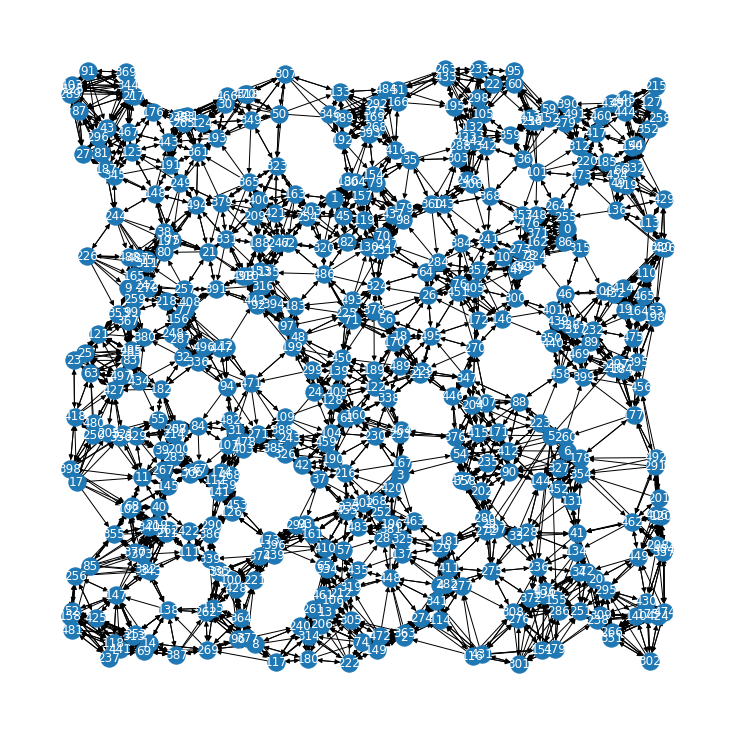

In [14]:
plot(V, B)